In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from wordcloud import WordCloud

import datetime
from datetime import datetime, timedelta, date

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


import nltk
nltk.data.path.append("C:/Users/dusti/nltk_data")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Ensure NLTK resources are downloaded and available
nltk.download('stopwords', download_dir='C:/Users/dusti/nltk_data')
nltk.download('punkt', download_dir='C:/Users/dusti/nltk_data')
nltk.download('wordnet', download_dir='C:/Users/dusti/nltk_data')
nltk.download('omw-1.4', download_dir='C:/Users/dusti/nltk_data')
nltk.download('punkt_tab', download_dir='C:/Users/dusti/nltk_data')

[nltk_data] Downloading package stopwords to nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


#### EDA

In [2]:
df = pd.read_csv("BBC News Train.csv")
df.head()


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB


In [4]:
df.dtypes.value_counts()

object    2
int64     1
dtype: int64

In [5]:
df.isnull().sum()
df.duplicated().sum()

0

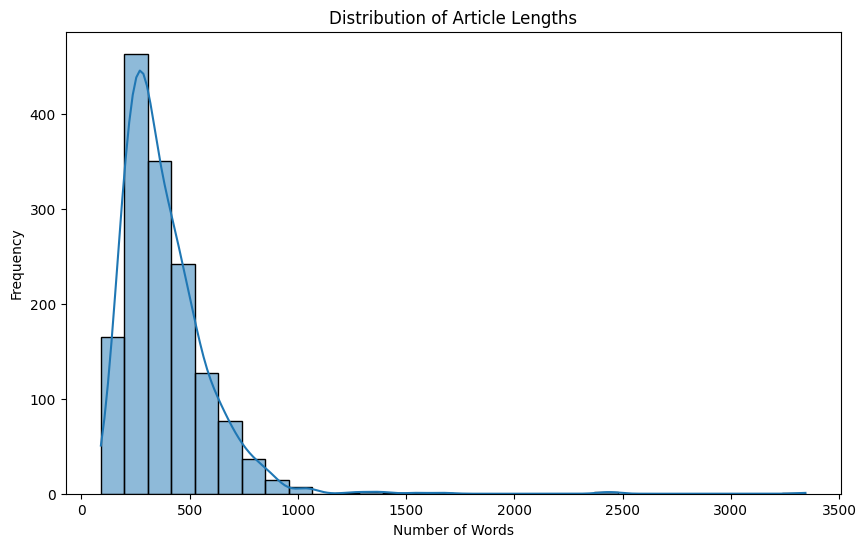

In [6]:
# Add a column for article length
df['Article_Length'] = df['Text'].apply(lambda x: len(x.split()))

# Plot histogram of article lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['Article_Length'], bins=30, kde=True)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

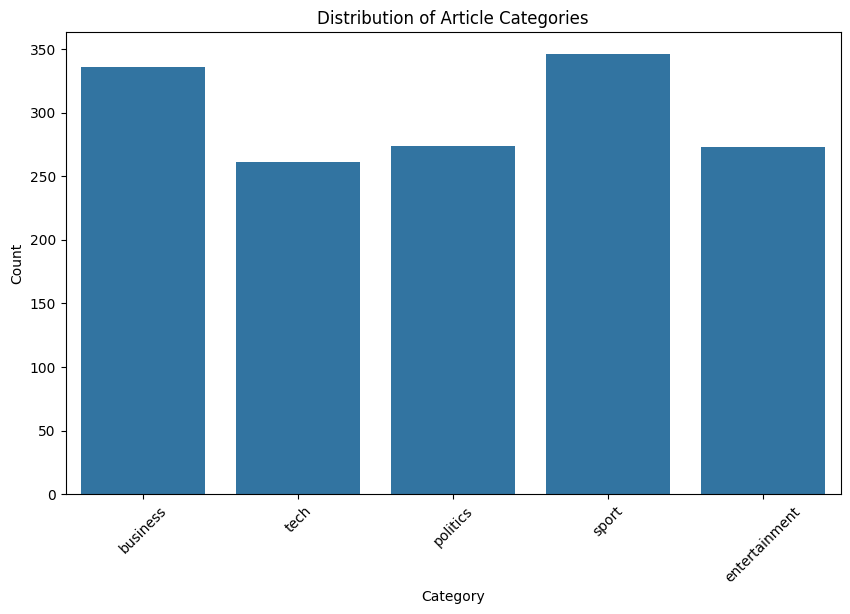

In [7]:
# Distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Article Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

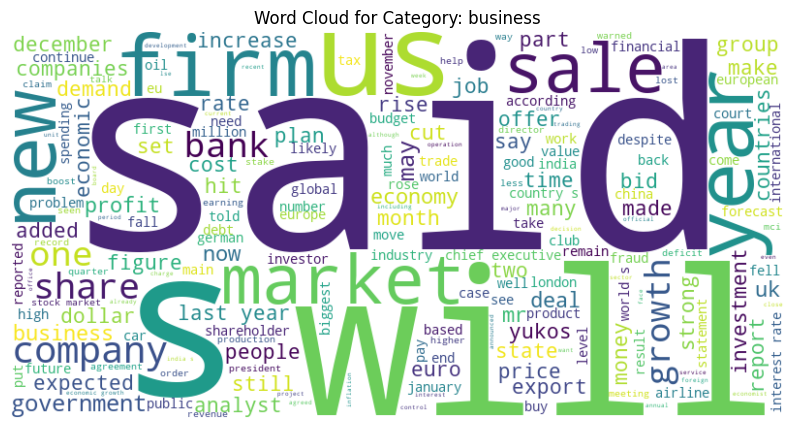

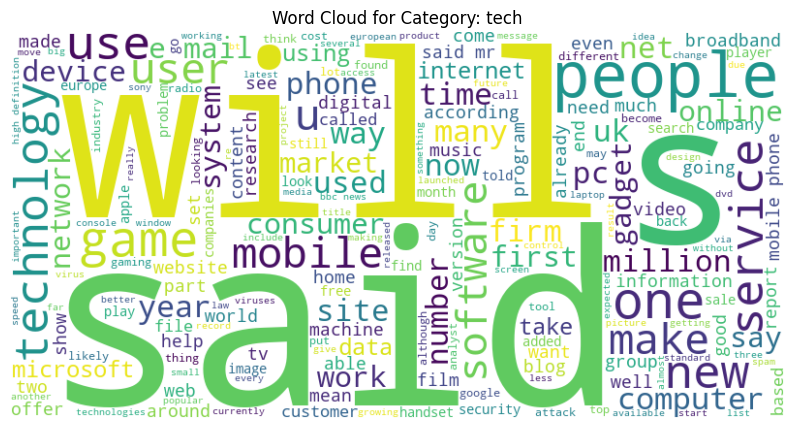

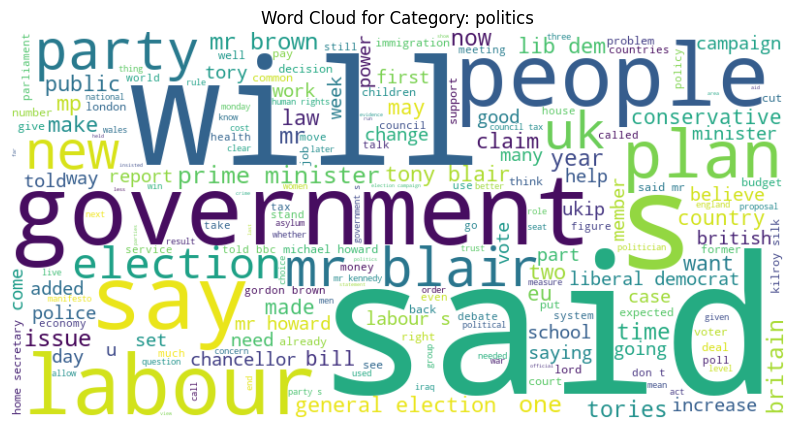

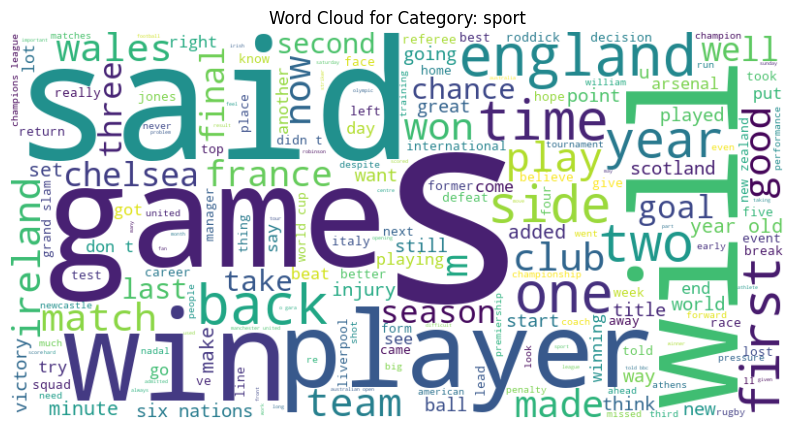

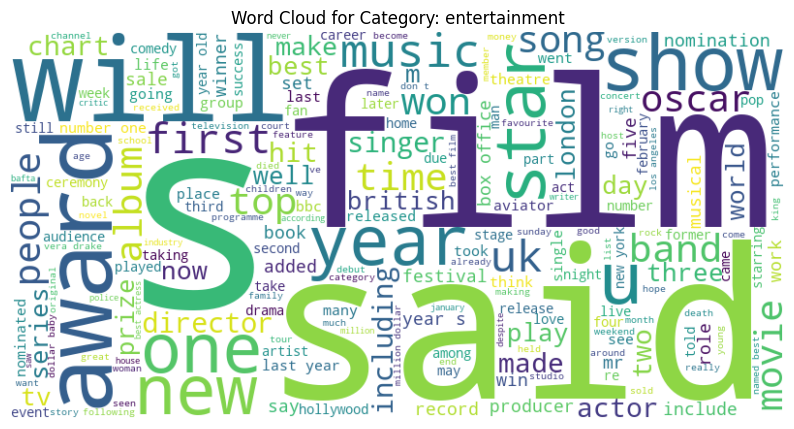

In [8]:
# Function to plot word cloud
def plot_word_cloud(category):
    text = ' '.join(df[df['Category'] == category]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

# Plot word cloud for each category
for category in df['Category'].unique():
    plot_word_cloud(category)

#### Preprocess the data

In [26]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(tokens)


In [27]:
df['Processed_Text'] = df['Text'].apply(preprocess_text)


In [28]:
df.head()

,ArticleId,Text,Category,Article_Length,Processed_Text
0,1833,worldcom ex-boss launches defence lawyers defe...,business,301,worldcom launch defence lawyer defending forme...
1,154,german business confidence slides german busin...,business,325,german business confidence slide german busine...
2,1101,bbc poll indicates economic gloom citizens in ...,business,514,bbc poll indicates economic gloom citizen majo...
3,1976,lifestyle governs mobile choice faster bett...,tech,634,lifestyle governs mobile choice faster better ...
4,917,enron bosses in $168m payout eighteen former e...,business,355,enron boss payout eighteen former enron direct...


#### TF-IDF  (Term Frequency-Inverse Document Frequency)
TF-IDF is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). The TF-IDF value increases proportionally with the number of times a word appears in a document but is offset by the frequency of the word in the corpus, which helps to adjust for the fact that some words appear more frequently in general.

In [30]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text'])

tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 180306 stored elements and shape (1490, 5000)>